# Trabalho de Conclusão de Curso do NanoDegree
## Objetivo: Através de sons ambientes conseguir identificar disparos à fim de melhorar a segurança pública
### Dataset utilizado: https://serv.cusp.nyu.edu/projects/urbansounddataset/

***
O Dataset Original possuía bem menos exemplos de tiros, sendo que nesse caso eu extraí outros áudios de tiros coletados no youtube à fim de melhorar os meus exemplos e conseguir uma alta taxa de acurácia com os algoritmos

In [62]:
import pandas as pd
import collections

train_data = pd.read_csv('./train/train.csv')
print collections.Counter(train_data.Class)


Counter({'jackhammer': 668, 'engine_idling': 624, 'siren': 607, 'air_conditioner': 600, 'children_playing': 600, 'street_music': 600, 'dog_bark': 600, 'drilling': 600, 'car_horn': 306, 'gun_shot': 291})


#### Ao ler o Dataset encontramos os seguintes tipos de som
* jackhammer
* engine_idling
* siren
* air_conditioner
* children_playing
* street_music
* dog_bark
* drilling
* car_horn
* gun_shot


Abaixo vemos uma classe de som e o seu gráfico

('Class: ', 'air_conditioner')


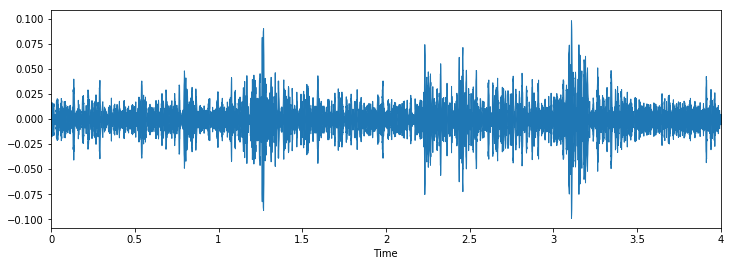

In [75]:
%matplotlib inline
import librosa.display
import glob
import pandas as pd
import random
example = random.choice(train_data.index)
print('Class: ', train_data.Class[example])
x, sr = librosa.load('./train/Train/' + str(train_data.ID[example]) + '.wav')
plt.figure(figsize=(12, 4))
librosa.display.waveplot(x, sr=sr)



E esses são os sons de tiros

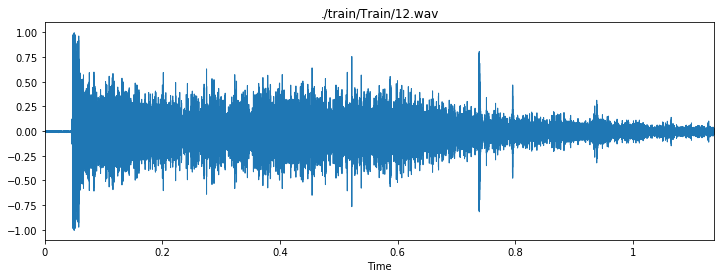

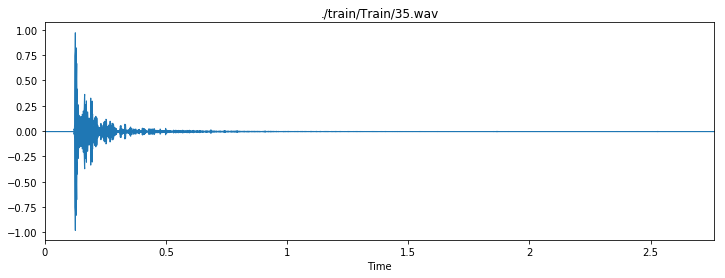

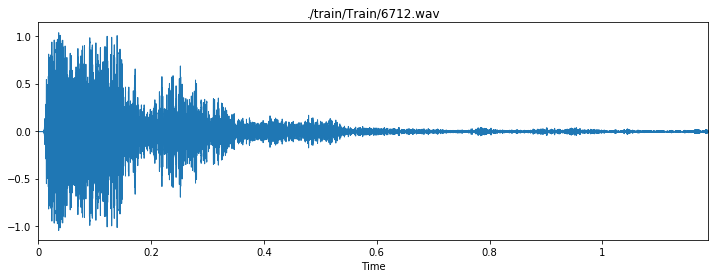

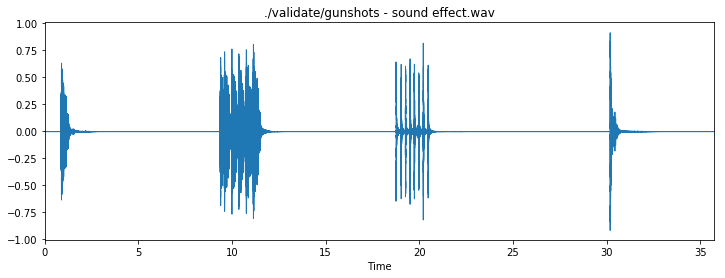

In [81]:
listSounds = ['./train/Train/12.wav', './train/Train/35.wav', './train/Train/6712.wav', './validate/gunshots - sound effect.wav']
for sound in listSounds:
    x, sr = librosa.load(sound)
    plt.figure(figsize=(12, 4))
    librosa.display.waveplot(x, sr=sr)
    plt.title(sound)

In [ ]:
E esses são os sons de outras classes


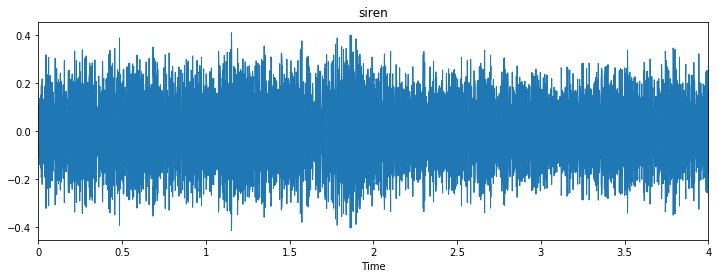

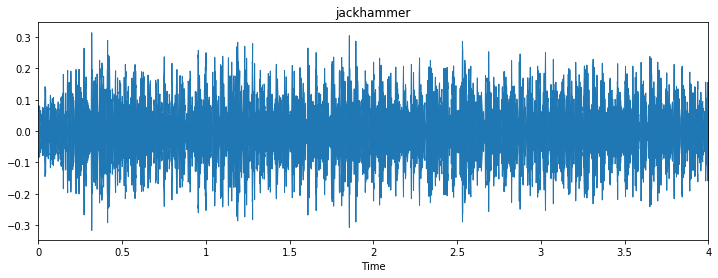

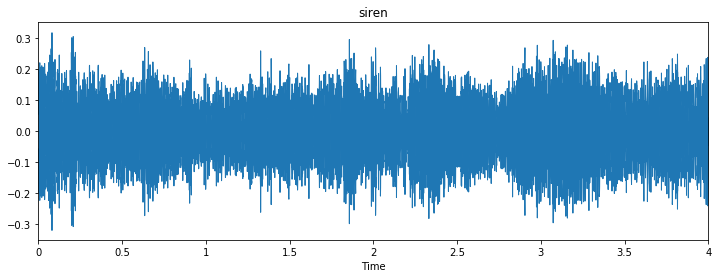

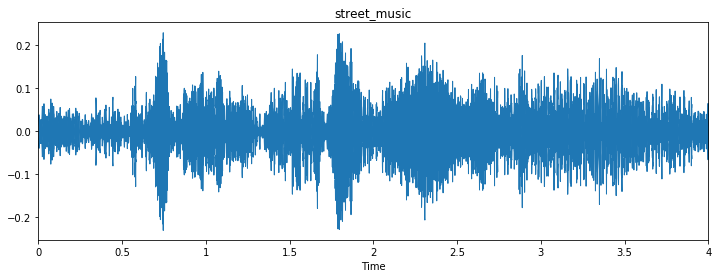

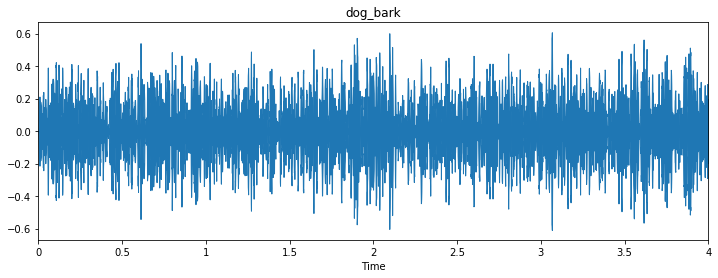

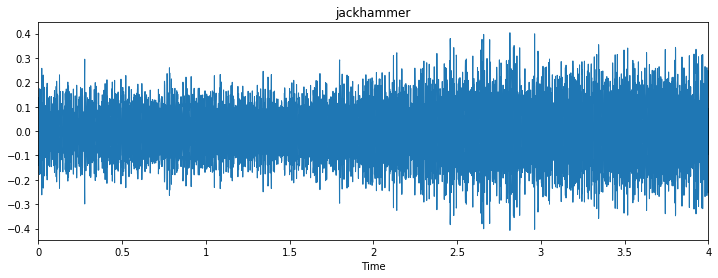

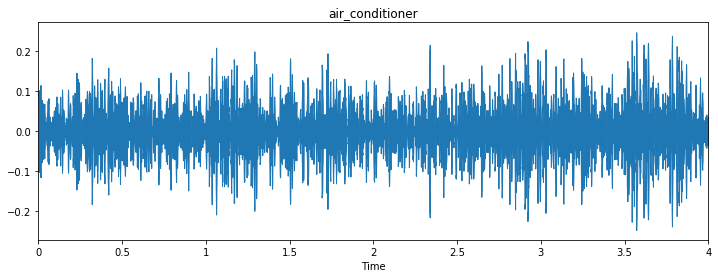

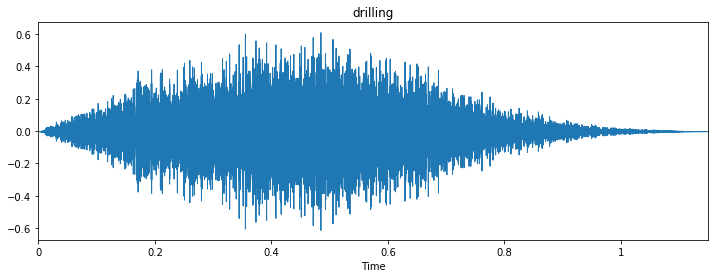

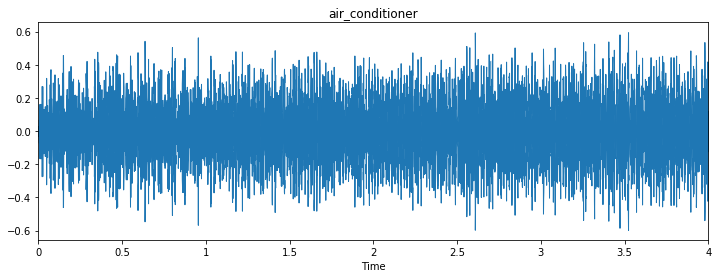

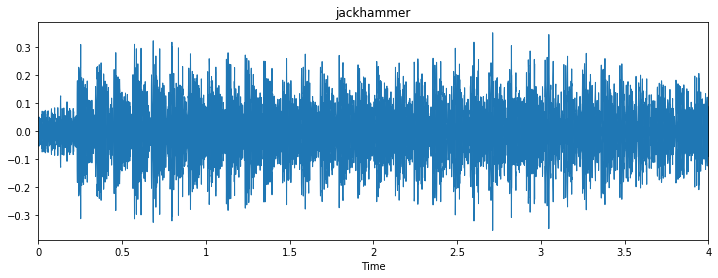

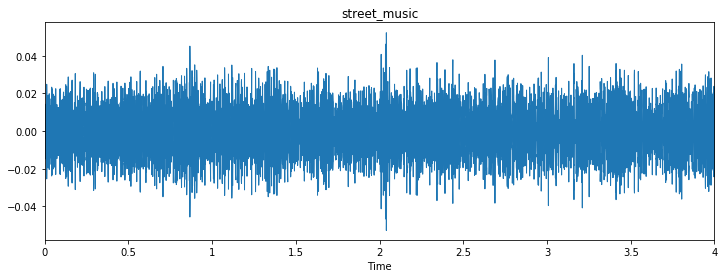

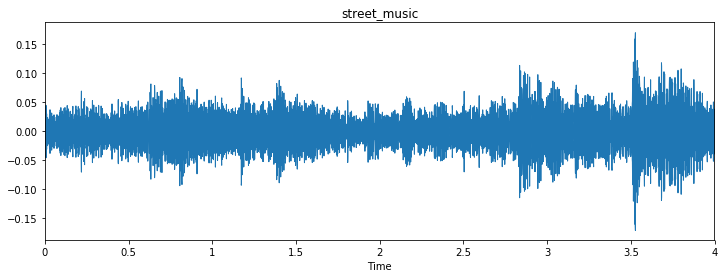

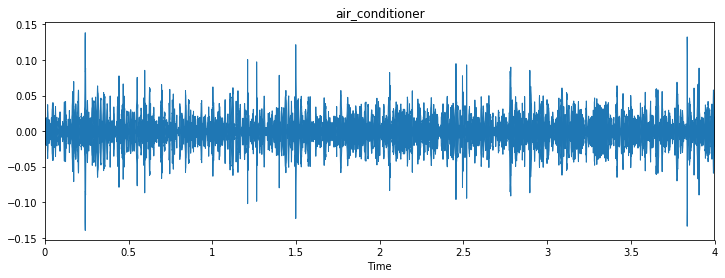

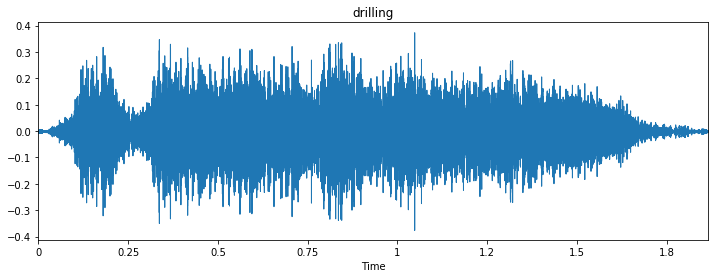

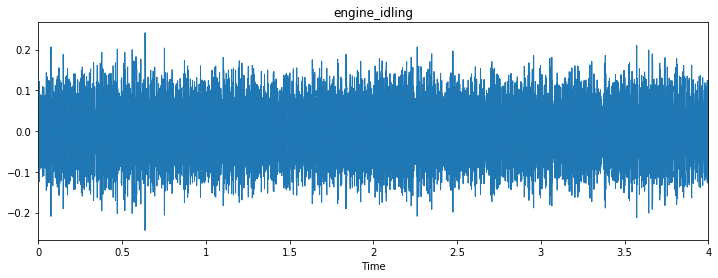

In [95]:
for index, row in train_data[60:75].iterrows():
    x, sr = librosa.load('./train/Train/' + str(row.ID) + '.wav')
    plt.figure(figsize=(12, 4))
    librosa.display.waveplot(x, sr=sr)
    plt.title(row.Class)

Como pode ver o som do tiro é bem característico perante o som dos outros sons urbanos
***
Abaixo então iremos criar o nosso dataset de treinamento onde será lido o arquivo de train.csv e o label será classificado como "1" se for tiro e "0" se não for tiro.
Para extrair as features do som foi utilizada a biblioteca librosa que consegue ler o áudio e foram extraídas 100 features do áudio.

In [1]:
#Realizar 3 tipos de classificadores, com o dataset de áudio
def parser(row):
   # function to load files and extract features
    if row.ID.endswith('.wav'):
        file_name = './validate/'+row.ID
    else:
        file_name = './train/Train/'+str(row.ID)+'.wav'
    try:
        print file_name
        X, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=100).T,axis=0)
    except Exception as e:
        print ("Error encountered: ", file_name, e)
        return None, None
    feature = mfccs
    if row.Class != 'gun_shot':
        label = '0'
    else:
        label = 1
    
    return [feature, label]


In [96]:
import librosa
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

train_data = pd.read_csv('./train/train.csv')
temp = train_data.apply(parser, axis=1)
temp.columns = ['feature', 'label']

X = np.array(temp.feature.tolist())
y = np.array(temp.label.tolist())


print "Features loaded"
print collections.Counter(y)

./train/Train/0.wav
./train/Train/0.wav
./train/Train/1.wav
./train/Train/2.wav
./train/Train/3.wav
./train/Train/4.wav
./train/Train/6.wav
./train/Train/10.wav
./train/Train/11.wav
./train/Train/12.wav
./train/Train/15.wav
./train/Train/17.wav
./train/Train/18.wav
./train/Train/19.wav
./train/Train/20.wav
./train/Train/22.wav
./train/Train/24.wav
./train/Train/26.wav
./train/Train/27.wav
./train/Train/32.wav
./train/Train/33.wav
./train/Train/35.wav
./train/Train/36.wav
./train/Train/37.wav
./train/Train/38.wav
./train/Train/40.wav
./train/Train/42.wav
./train/Train/43.wav
./train/Train/44.wav
./train/Train/45.wav
./train/Train/46.wav
./train/Train/47.wav
./train/Train/48.wav
./train/Train/49.wav
./train/Train/50.wav
./train/Train/52.wav
./train/Train/54.wav
./train/Train/56.wav
./train/Train/57.wav
./train/Train/59.wav
./train/Train/60.wav
./train/Train/61.wav
./train/Train/63.wav
./train/Train/65.wav
./train/Train/66.wav
./train/Train/67.wav
./train/Train/68.wav
./train/Train/71.wav

./train/Train/572.wav
./train/Train/573.wav
./train/Train/575.wav
./train/Train/576.wav
./train/Train/578.wav
./train/Train/579.wav
./train/Train/580.wav
./train/Train/583.wav
./train/Train/584.wav
./train/Train/585.wav
./train/Train/586.wav
./train/Train/587.wav
./train/Train/589.wav
./train/Train/590.wav
./train/Train/593.wav
./train/Train/594.wav
./train/Train/597.wav
./train/Train/598.wav
./train/Train/599.wav
./train/Train/600.wav
./train/Train/603.wav
./train/Train/604.wav
./train/Train/605.wav
./train/Train/606.wav
./train/Train/607.wav
./train/Train/610.wav
./train/Train/611.wav
./train/Train/612.wav
./train/Train/613.wav
./train/Train/614.wav
./train/Train/615.wav
./train/Train/619.wav
./train/Train/620.wav
./train/Train/621.wav
./train/Train/622.wav
./train/Train/623.wav
./train/Train/624.wav
./train/Train/629.wav
./train/Train/630.wav
./train/Train/631.wav
./train/Train/633.wav
./train/Train/635.wav
./train/Train/636.wav
./train/Train/639.wav
./train/Train/642.wav
./train/Tr

./train/Train/1156.wav
./train/Train/1157.wav
./train/Train/1158.wav
./train/Train/1160.wav
./train/Train/1162.wav
./train/Train/1168.wav
./train/Train/1174.wav
./train/Train/1175.wav
./train/Train/1176.wav
./train/Train/1180.wav
./train/Train/1181.wav
./train/Train/1182.wav
./train/Train/1183.wav
./train/Train/1186.wav
./train/Train/1187.wav
./train/Train/1188.wav
./train/Train/1189.wav
./train/Train/1191.wav
./train/Train/1195.wav
./train/Train/1200.wav
./train/Train/1203.wav
./train/Train/1205.wav
./train/Train/1206.wav
./train/Train/1209.wav
./train/Train/1210.wav
./train/Train/1214.wav
./train/Train/1217.wav
./train/Train/1218.wav
./train/Train/1219.wav
./train/Train/1220.wav
./train/Train/1224.wav
./train/Train/1226.wav
./train/Train/1228.wav
./train/Train/1230.wav
./train/Train/1231.wav
./train/Train/1232.wav
./train/Train/1235.wav
./train/Train/1236.wav
./train/Train/1237.wav
./train/Train/1240.wav
./train/Train/1241.wav
./train/Train/1242.wav
./train/Train/1243.wav
./train/Tra

./train/Train/1766.wav
./train/Train/1767.wav
./train/Train/1768.wav
./train/Train/1769.wav
./train/Train/1771.wav
./train/Train/1773.wav
./train/Train/1774.wav
./train/Train/1776.wav
./train/Train/1777.wav
./train/Train/1779.wav
./train/Train/1780.wav
./train/Train/1782.wav
./train/Train/1783.wav
./train/Train/1786.wav
./train/Train/1787.wav
./train/Train/1789.wav
./train/Train/1791.wav
./train/Train/1792.wav
./train/Train/1794.wav
./train/Train/1795.wav
./train/Train/1796.wav
./train/Train/1800.wav
./train/Train/1801.wav
./train/Train/1802.wav
./train/Train/1803.wav
./train/Train/1805.wav
./train/Train/1806.wav
./train/Train/1807.wav
./train/Train/1808.wav
./train/Train/1809.wav
./train/Train/1812.wav
./train/Train/1813.wav
./train/Train/1816.wav
./train/Train/1817.wav
./train/Train/1818.wav
./train/Train/1819.wav
./train/Train/1820.wav
./train/Train/1822.wav
./train/Train/1825.wav
./train/Train/1826.wav
./train/Train/1827.wav
./train/Train/1828.wav
./train/Train/1829.wav
./train/Tra

./train/Train/2343.wav
./train/Train/2344.wav
./train/Train/2345.wav
./train/Train/2347.wav
./train/Train/2349.wav
./train/Train/2351.wav
./train/Train/2353.wav
./train/Train/2354.wav
./train/Train/2358.wav
./train/Train/2360.wav
./train/Train/2363.wav
./train/Train/2364.wav
./train/Train/2366.wav
./train/Train/2368.wav
./train/Train/2369.wav
./train/Train/2371.wav
./train/Train/2372.wav
./train/Train/2373.wav
./train/Train/2378.wav
./train/Train/2379.wav
./train/Train/2380.wav
./train/Train/2382.wav
./train/Train/2384.wav
./train/Train/2386.wav
./train/Train/2388.wav
./train/Train/2389.wav
./train/Train/2390.wav
./train/Train/2394.wav
./train/Train/2395.wav
./train/Train/2398.wav
./train/Train/2401.wav
./train/Train/2402.wav
./train/Train/2403.wav
./train/Train/2404.wav
./train/Train/2405.wav
./train/Train/2408.wav
./train/Train/2410.wav
./train/Train/2411.wav
./train/Train/2412.wav
./train/Train/2413.wav
./train/Train/2414.wav
./train/Train/2415.wav
./train/Train/2416.wav
./train/Tra

./train/Train/2926.wav
./train/Train/2927.wav
./train/Train/2928.wav
./train/Train/2929.wav
./train/Train/2930.wav
./train/Train/2931.wav
./train/Train/2932.wav
./train/Train/2933.wav
./train/Train/2934.wav
./train/Train/2935.wav
./train/Train/2936.wav
./train/Train/2939.wav
./train/Train/2940.wav
./train/Train/2942.wav
./train/Train/2943.wav
./train/Train/2944.wav
./train/Train/2945.wav
./train/Train/2946.wav
./train/Train/2950.wav
./train/Train/2951.wav
./train/Train/2954.wav
./train/Train/2955.wav
./train/Train/2956.wav
./train/Train/2957.wav
./train/Train/2959.wav
./train/Train/2960.wav
./train/Train/2961.wav
./train/Train/2962.wav
./train/Train/2963.wav
./train/Train/2966.wav
./train/Train/2969.wav
./train/Train/2971.wav
./train/Train/2972.wav
./train/Train/2974.wav
./train/Train/2976.wav
./train/Train/2980.wav
./train/Train/2982.wav
./train/Train/2983.wav
./train/Train/2984.wav
./train/Train/2986.wav
./train/Train/2987.wav
./train/Train/2988.wav
./train/Train/2989.wav
./train/Tra

./train/Train/3478.wav
./train/Train/3480.wav
./train/Train/3481.wav
./train/Train/3482.wav
./train/Train/3483.wav
./train/Train/3486.wav
./train/Train/3489.wav
./train/Train/3491.wav
./train/Train/3492.wav
./train/Train/3493.wav
./train/Train/3495.wav
./train/Train/3496.wav
./train/Train/3499.wav
./train/Train/3501.wav
./train/Train/3503.wav
./train/Train/3504.wav
./train/Train/3507.wav
./train/Train/3508.wav
./train/Train/3509.wav
./train/Train/3510.wav
./train/Train/3514.wav
./train/Train/3515.wav
./train/Train/3516.wav
./train/Train/3517.wav
./train/Train/3518.wav
./train/Train/3519.wav
./train/Train/3520.wav
./train/Train/3522.wav
./train/Train/3523.wav
./train/Train/3525.wav
./train/Train/3526.wav
./train/Train/3528.wav
./train/Train/3529.wav
./train/Train/3531.wav
./train/Train/3533.wav
./train/Train/3534.wav
./train/Train/3536.wav
./train/Train/3537.wav
./train/Train/3538.wav
./train/Train/3539.wav
./train/Train/3540.wav
./train/Train/3542.wav
./train/Train/3543.wav
./train/Tra

./train/Train/4055.wav
./train/Train/4056.wav
./train/Train/4057.wav
./train/Train/4058.wav
./train/Train/4062.wav
./train/Train/4064.wav
./train/Train/4066.wav
./train/Train/4067.wav
./train/Train/4068.wav
./train/Train/4069.wav
./train/Train/4070.wav
./train/Train/4073.wav
./train/Train/4075.wav
./train/Train/4076.wav
./train/Train/4077.wav
./train/Train/4078.wav
./train/Train/4080.wav
./train/Train/4081.wav
./train/Train/4083.wav
./train/Train/4084.wav
./train/Train/4085.wav
./train/Train/4086.wav
./train/Train/4087.wav
./train/Train/4089.wav
./train/Train/4091.wav
./train/Train/4093.wav
./train/Train/4094.wav
./train/Train/4095.wav
./train/Train/4096.wav
./train/Train/4097.wav
./train/Train/4100.wav
./train/Train/4101.wav
./train/Train/4102.wav
./train/Train/4103.wav
./train/Train/4104.wav
./train/Train/4106.wav
./train/Train/4110.wav
./train/Train/4111.wav
./train/Train/4117.wav
./train/Train/4118.wav
./train/Train/4119.wav
./train/Train/4121.wav
./train/Train/4122.wav
./train/Tra

./train/Train/4655.wav
./train/Train/4657.wav
./train/Train/4658.wav
./train/Train/4659.wav
./train/Train/4661.wav
./train/Train/4662.wav
./train/Train/4663.wav
./train/Train/4665.wav
./train/Train/4666.wav
./train/Train/4667.wav
./train/Train/4668.wav
./train/Train/4669.wav
./train/Train/4672.wav
./train/Train/4674.wav
./train/Train/4676.wav
./train/Train/4677.wav
./train/Train/4679.wav
./train/Train/4680.wav
./train/Train/4682.wav
./train/Train/4683.wav
./train/Train/4684.wav
./train/Train/4685.wav
./train/Train/4686.wav
./train/Train/4688.wav
./train/Train/4690.wav
./train/Train/4692.wav
./train/Train/4693.wav
./train/Train/4695.wav
./train/Train/4697.wav
./train/Train/4698.wav
./train/Train/4702.wav
./train/Train/4703.wav
./train/Train/4704.wav
./train/Train/4705.wav
./train/Train/4707.wav
./train/Train/4708.wav
./train/Train/4714.wav
./train/Train/4715.wav
./train/Train/4716.wav
./train/Train/4718.wav
./train/Train/4721.wav
./train/Train/4722.wav
./train/Train/4723.wav
./train/Tra

./train/Train/5228.wav
./train/Train/5233.wav
./train/Train/5234.wav
./train/Train/5236.wav
./train/Train/5237.wav
./train/Train/5239.wav
./train/Train/5241.wav
./train/Train/5243.wav
./train/Train/5244.wav
./train/Train/5246.wav
./train/Train/5247.wav
./train/Train/5248.wav
./train/Train/5251.wav
./train/Train/5253.wav
./train/Train/5255.wav
./train/Train/5257.wav
./train/Train/5259.wav
./train/Train/5262.wav
./train/Train/5263.wav
./train/Train/5264.wav
./train/Train/5265.wav
./train/Train/5266.wav
./train/Train/5268.wav
./train/Train/5270.wav
./train/Train/5271.wav
./train/Train/5272.wav
./train/Train/5277.wav
./train/Train/5278.wav
./train/Train/5279.wav
./train/Train/5281.wav
./train/Train/5283.wav
./train/Train/5284.wav
./train/Train/5289.wav
./train/Train/5290.wav
./train/Train/5291.wav
./train/Train/5292.wav
./train/Train/5294.wav
./train/Train/5297.wav
./train/Train/5299.wav
./train/Train/5302.wav
./train/Train/5304.wav
./train/Train/5307.wav
./train/Train/5308.wav
./train/Tra

./train/Train/5840.wav
./train/Train/5841.wav
./train/Train/5842.wav
./train/Train/5844.wav
./train/Train/5847.wav
./train/Train/5848.wav
./train/Train/5850.wav
./train/Train/5851.wav
./train/Train/5852.wav
./train/Train/5854.wav
./train/Train/5856.wav
./train/Train/5857.wav
./train/Train/5858.wav
./train/Train/5859.wav
./train/Train/5862.wav
./train/Train/5863.wav
./train/Train/5864.wav
./train/Train/5865.wav
./train/Train/5867.wav
./train/Train/5869.wav
./train/Train/5870.wav
./train/Train/5871.wav
./train/Train/5874.wav
./train/Train/5876.wav
./train/Train/5877.wav
./train/Train/5879.wav
./train/Train/5881.wav
./train/Train/5882.wav
./train/Train/5886.wav
./train/Train/5887.wav
./train/Train/5888.wav
./train/Train/5889.wav
./train/Train/5890.wav
./train/Train/5891.wav
./train/Train/5892.wav
./train/Train/5893.wav
./train/Train/5897.wav
./train/Train/5900.wav
./train/Train/5901.wav
./train/Train/5902.wav
./train/Train/5903.wav
./train/Train/5904.wav
./train/Train/5906.wav
./train/Tra

./train/Train/6418.wav
./train/Train/6420.wav
./train/Train/6422.wav
./train/Train/6423.wav
./train/Train/6424.wav
./train/Train/6426.wav
./train/Train/6427.wav
./train/Train/6431.wav
./train/Train/6432.wav
./train/Train/6434.wav
./train/Train/6435.wav
./train/Train/6436.wav
./train/Train/6437.wav
./train/Train/6440.wav
./train/Train/6441.wav
./train/Train/6442.wav
./train/Train/6443.wav
./train/Train/6445.wav
./train/Train/6446.wav
./train/Train/6448.wav
./train/Train/6449.wav
./train/Train/6450.wav
./train/Train/6451.wav
./train/Train/6452.wav
./train/Train/6453.wav
./train/Train/6454.wav
./train/Train/6455.wav
./train/Train/6456.wav
./train/Train/6457.wav
./train/Train/6459.wav
./train/Train/6460.wav
./train/Train/6461.wav
./train/Train/6462.wav
./train/Train/6463.wav
./train/Train/6464.wav
./train/Train/6466.wav
./train/Train/6467.wav
./train/Train/6468.wav
./train/Train/6469.wav
./train/Train/6473.wav
./train/Train/6474.wav
./train/Train/6475.wav
./train/Train/6477.wav
./train/Tra

./train/Train/6979.wav
./train/Train/6981.wav
./train/Train/6982.wav
./train/Train/6984.wav
./train/Train/6985.wav
./train/Train/6986.wav
./train/Train/6990.wav
./train/Train/6991.wav
./train/Train/6992.wav
./train/Train/6993.wav
./train/Train/6998.wav
./train/Train/6999.wav
./train/Train/7000.wav
./train/Train/7001.wav
./train/Train/7002.wav
./train/Train/7003.wav
./train/Train/7004.wav
./train/Train/7005.wav
./train/Train/7006.wav
./train/Train/7007.wav
./train/Train/7008.wav
./train/Train/7009.wav
./train/Train/7010.wav
./train/Train/7012.wav
./train/Train/7013.wav
./train/Train/7014.wav
./train/Train/7015.wav
./train/Train/7016.wav
./train/Train/7017.wav
./train/Train/7018.wav
./train/Train/7019.wav
./train/Train/7020.wav
./train/Train/7022.wav
./train/Train/7025.wav
./train/Train/7026.wav
./train/Train/7027.wav
./train/Train/7028.wav
./train/Train/7029.wav
./train/Train/7030.wav
./train/Train/7031.wav
./train/Train/7032.wav
./train/Train/7035.wav
./train/Train/7036.wav
./train/Tra

./train/Train/7539.wav
./train/Train/7541.wav
./train/Train/7542.wav
./train/Train/7543.wav
./train/Train/7547.wav
./train/Train/7548.wav
./train/Train/7550.wav
./train/Train/7552.wav
./train/Train/7553.wav
./train/Train/7556.wav
./train/Train/7558.wav
./train/Train/7560.wav
./train/Train/7561.wav
./train/Train/7563.wav
./train/Train/7565.wav
./train/Train/7566.wav
./train/Train/7567.wav
./train/Train/7568.wav
./train/Train/7569.wav
./train/Train/7570.wav
./train/Train/7573.wav
./train/Train/7574.wav
./train/Train/7576.wav
./train/Train/7577.wav
./train/Train/7578.wav
./train/Train/7579.wav
./train/Train/7580.wav
./train/Train/7581.wav
./train/Train/7582.wav
./train/Train/7584.wav
./train/Train/7585.wav
./train/Train/7586.wav
./train/Train/7589.wav
./train/Train/7592.wav
./train/Train/7593.wav
./train/Train/7595.wav
./train/Train/7596.wav
./train/Train/7597.wav
./train/Train/7598.wav
./train/Train/7599.wav
./train/Train/7600.wav
./train/Train/7601.wav
./train/Train/7602.wav
./train/Tra

./train/Train/8108.wav
./train/Train/8110.wav
./train/Train/8111.wav
./train/Train/8114.wav
./train/Train/8118.wav
./train/Train/8119.wav
./train/Train/8122.wav
./train/Train/8125.wav
./train/Train/8127.wav
./train/Train/8128.wav
./train/Train/8130.wav
./train/Train/8131.wav
./train/Train/8133.wav
./train/Train/8135.wav
./train/Train/8137.wav
./train/Train/8140.wav
./train/Train/8142.wav
./train/Train/8143.wav
./train/Train/8144.wav
./train/Train/8145.wav
./train/Train/8146.wav
./train/Train/8148.wav
./train/Train/8150.wav
./train/Train/8151.wav
./train/Train/8152.wav
./train/Train/8154.wav
./train/Train/8155.wav
./train/Train/8156.wav
./train/Train/8161.wav
./train/Train/8166.wav
./train/Train/8167.wav
./train/Train/8168.wav
./train/Train/8171.wav
./train/Train/8172.wav
./train/Train/8173.wav
./train/Train/8174.wav
./train/Train/8176.wav
./train/Train/8177.wav
./train/Train/8180.wav
./train/Train/8181.wav
./train/Train/8182.wav
./train/Train/8183.wav
./train/Train/8184.wav
./train/Tra

./train/Train/8685.wav
./train/Train/8690.wav
./train/Train/8691.wav
./train/Train/8693.wav
./train/Train/8694.wav
./train/Train/8695.wav
./train/Train/8699.wav
./train/Train/8701.wav
./train/Train/8703.wav
./train/Train/8704.wav
./train/Train/8705.wav
./train/Train/8706.wav
./train/Train/8707.wav
./train/Train/8709.wav
./train/Train/8710.wav
./train/Train/8711.wav
./train/Train/8712.wav
./train/Train/8713.wav
./train/Train/8714.wav
./train/Train/8715.wav
./train/Train/8716.wav
./train/Train/8717.wav
./train/Train/8720.wav
./train/Train/8721.wav
./train/Train/8722.wav
./train/Train/8723.wav
./train/Train/8724.wav
./train/Train/8725.wav
./train/Train/8726.wav
./train/Train/8727.wav
./train/Train/8728.wav
./train/Train/8729.wav
./validate/Winchester__73_single_shots_-Grant_Evans-1404648206.wav
./validate/380_gunshot_single-mike-koenig.wav
./validate/9_mm_gunshot-mike-koenig-123.wav
./validate/gunshot sound effects 6 times (2).wav
./validate/machine-gun-02.wav
./validate/Boom Stick shot g

In [97]:
print collections.Counter(temp.label)
print temp[3:5]

Counter({'0': 5205, 1: 291})
                                             feature label
3  [-213.30328286853114, 89.27180753632311, -55.2...     0
4  [-237.93349628536635, 135.8918560563283, 39.25...     0


**Temos 291 sons que são de tiro e 5205 que não são de tiro**

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=50)


In [111]:
counter_train = collections.Counter(y_train)
counter_test = collections.Counter(y_test)
print 'No Dataset de treinamento temos {:} Sons Normais e {:} Sons de tiros'.format(counter_train['0'], counter_train['1'])
print 'No Dataset de teste temos {:} Sons Normais e {:} Sons de tiros'.format(counter_test['0'], counter_test['1'])

No Dataset de treinamento temos 3910 Sons Normais e 212 Sons de tiros
No Dataset de teste temos 1295 Sons Normais e 79 Sons de tiros


### Para realizar essa classificação iremos usar 3 classificadores à fim de verificar qual é o melhor que se encaixa
* Random Forest
* SVM
* Convolutional Neural Network

In [22]:
#Build Classifier Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import time

t0 = time.time()



parameters_classifier = {"max_depth": [2, 6, 9, 12]
            ,"min_samples_split" :[2, 10, 20, 50]
            ,"n_estimators" : [10, 50, 100]
            ,"min_samples_leaf": [1, 10, 100]
            ,"max_features": (4, 20 , 100,"sqrt")
            ,"criterion": ('gini','entropy')
            }


parameters_classifier = {"n_estimators" : [32,33,34,35],"max_features": (62,63,64)}

#Best RandomForest
rf_regr = RandomForestClassifier(criterion='entropy', min_samples_split=2, min_samples_leaf=5 , max_depth=121, max_features=63, n_estimators=33)

#model_rcl = GridSearchCV(rf_regr,parameters_classifier, n_jobs = 3, cv = 10)


model_rcl.fit(X_train, y_train)

print model_rcl.best_params_

learned_parameters = model_rcl.best_params_

t1 = time.time()

total = t1-t0


print('finished: time {0:.3f}'.format(total))


{'max_features': 63, 'n_estimators': 33}
finished: time 252.806


Para conseguir os melhores parâmetros para usar o RandomForestClassifier foi usado o GridSearch com os parâmetros: 
```python
parameters_classifier = {"max_depth": [2, 6, 9, 12]
            ,"min_samples_split" :[2, 10, 20, 50]
            ,"n_estimators" : [10, 50, 100]
            ,"min_samples_leaf": [1, 10, 100]
            ,"max_features": (4, 20 , 100,"sqrt")
            ,"criterion": ('gini','entropy')
            }
            
```
E a cada vez que o GridSearch rodava foi coletado quais eram os melhores parâmetros e assim chegamos no melhor classificador que foi
```python

RandomForestClassifier(criterion='entropy', min_samples_split=2, min_samples_leaf=5 , max_depth=121, max_features=63, n_estimators=33)

```




In [23]:
rfc = RandomForestClassifier(criterion='entropy', min_samples_split=2, min_samples_leaf=5 , max_depth=121, max_features=63, n_estimators=33)
model_rcl = rfc.fit(X_train,y_train)
print model_rcl.score(X_test,y_test)
y_pred = model_rcl.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9694323144104804
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      1295
          1       0.91      0.52      0.66        79

avg / total       0.97      0.97      0.97      1374

[[1291    4]
 [  38   41]]


In [24]:
#TEST 50%
0.9687045123726347
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      2602
          1       0.97      0.42      0.59       146

avg / total       0.97      0.97      0.96      2748

[[2600    2]
 [  84   62]]

#TEST 75%
0.9655507035419699
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      3911
          1       0.97      0.34      0.50       211

avg / total       0.97      0.97      0.96      4122

[[3909    2]
 [ 140   71]]

# TEST 25%
0.9694323144104804
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      1295
          1       0.95      0.49      0.65        79

avg / total       0.97      0.97      0.96      1374

[[1293    2]
 [  40   39]]

# TEST 25%
0.9694323144104804
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      1295
          1       0.91      0.52      0.66        79

avg / total       0.97      0.97      0.97      1374

[[1291    4]
 [  38   41]]

IndentationError: unexpected indent (<ipython-input-24-2dce9170c19e>, line 3)

In [39]:
#SVM CLASSIFIER
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import time

t0 = time.time()

X_SVM_train = X_train
X_SVM_test = X_test
y_SVM_train = y_train
y_SVM_test = y_test

param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
              'kernel': ['rbf', 'poly', 'sigmoid'],
              'decision_function_shape': ['ovo', 'ovr']}

param_grid = {'C': [100,101,110],
              
             }

clf_SVM = GridSearchCV(SVC(class_weight='balanced', decision_function_shape='ovo', kernel='rbf', gamma=0.0001, C=100), param_grid, n_jobs = 3, cv = 10)
clf_SVM.fit(X_SVM_train,y_SVM_train)

print clf_SVM.best_params_

best_SVM_params = clf_SVM.best_params_

t1 = time.time()

total = t1-t0


print('finished: time {0:.3f}'.format(total))


{'C': 100}
finished: time 6.288


In [40]:
#clf_SVM_best = SVC(kernel=best_SVM_params['kernel'], decision_function_shape=best_SVM_params['decision_function_shape'], class_weight='balanced', C= best_SVM_params['C'], gamma=best_SVM_params['gamma'])
clf_SVM_best = SVC(class_weight='balanced', decision_function_shape='ovo', kernel='rbf', gamma=0.0001, C=100)
clf_SVM_best.fit(X_train,y_train)

y_pred = clf_SVM_best.predict(X_test)

print(classification_report(y_test, y_pred))
print (clf_SVM_best.score(X_test, y_test))
print(confusion_matrix(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99      1295
          1       0.86      0.82      0.84        79

avg / total       0.98      0.98      0.98      1374

0.9818049490538574
[[1284   11]
 [  14   65]]


In [41]:
# TESTE 50%
    precision    recall  f1-score   support

          0       0.99      0.99      0.99      2602
          1       0.86      0.82      0.84       146

avg / total       0.98      0.98      0.98      2748

0.9832605531295487
[[2583   19]
 [  27  119]]

# TESTE 75%
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      3911
          1       0.93      0.64      0.76       211

avg / total       0.98      0.98      0.98      4122

0.9793789422610383
[[3901   10]
 [  75  136]]

# TESTE 25%
             precision    recall  f1-score   support

          0       0.99      0.99      0.99      1295
          1       0.87      0.77      0.82        79

avg / total       0.98      0.98      0.98      1374

0.980349344978166
[[1286    9]
 [  18   61]]

# TESTE 25%
             precision    recall  f1-score   support

          0       0.99      0.99      0.99      1295
          1       0.86      0.82      0.84        79

avg / total       0.98      0.98      0.98      1374

0.9818049490538574
[[1284   11]
 [  14   65]]

IndentationError: unexpected indent (<ipython-input-41-db3b4cde0d8d>, line 2)

In [ ]:
# #Neural Net Classifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix
# from sklearn.neural_network import MLPRegressor
# import numpy as np

# X_NN_train = X_train
# y_NN_train = y_train
# X_NN_test = X_test
# y_NN_train = y_test

# print y_train.shape
# print y_NN_train.shape


# param_grid = {'hidden_layer_sizes':[(5,),(10,), (100,), (1000,)]}
#              #'activation' : ['identity', 'logistic', 'tanh', 'relu'],
#              #'solver' : ['lbfgs', 'sgd', 'adam']}
# model_nn = MLPRegressor(random_state=50, max_iter=1000, verbose=True, hidden_layer_sizes=(5,))
# model_nn.fit(X_NN_train, y_train)

# best_NN_params = model_nn.best_params_
# print best_NN_params


In [ ]:
# model_nn_final = MLPRegressor(random_state=50, max_iter=1000, verbose=True, 
#                               hidden_layer_sizes=best_NN_params['hidden_layer_sizes'],
#                               alpha=best_NN_params['alpha'],
#                               solver=best_NN_params['solver'],
#                               activation=best_NN_params['activation'])

# model_nn_final.fit(X_NN_train, y_NN_train)

# y_pred = model_nn_final.predict(X_NN_test)


# print(classification_report(y_NN_test, y_pred))
# # print (clf.score(X_NN_test, y_NN_test))
# print(confusion_matrix(y_NN_test, y_pred))

In [52]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
def kerasBuildModel():
    model = Sequential()
    model.add(Dense(256, activation='relu', input_dim=100))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='elu'))
    model.add(Dense(64, activation='elu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    model.summary()
    return model

In [57]:
## CNN

from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

X_CNN_train = X_train
y_CNN_train = y_train
X_CNN_test = X_test
y_CNN_test = y_test

lb = LabelEncoder()

transform = lb.fit_transform(y_train)

y_CNN_train = np_utils.to_categorical(transform)

seed = 7
np.random.seed(seed)


# estimators = []
# estimators.append(('standardize', StandardScaler()))
# estimators.append(('mlp', KerasClassifier(build_fn=kerasBuildModel, epochs=100, batch_size=5, verbose=0)))
# pipeline = Pipeline(estimators)
# kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
# results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
# print("Standardized: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
# evaluate model with standardized dataset
estimator = KerasClassifier(build_fn=kerasBuildModel, epochs=100, batch_size=5, verbose=1)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

# print y_CNN_train

# #print num_labels
# model = Sequential()

# model.add(Dense(256, activation='relu', input_dim=100))
# model.add(Dense(256, activation='relu'))
# model.add(Dense(128, activation='elu'))
# model.add(Dense(64, activation='elu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])
# model.summary()

# #model.compile(optimizer='adam', loss='binary_crossentropy')
# model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# score2=model.evaluate(X_CNN_test, y_CNN_test, batch_size=128)

# print score2

# y_cnn_pred = model.predict_classes(X_CNN_test)
 
# #print type(y_cnn_pred)
# #print type(y_test)

# y_testInt = y_test.astype(int)
# print y_testInt

# print(classification_report(y_testInt, y_cnn_pred))

# print(confusion_matrix(y_testInt, y_cnn_pred))
          

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 256)               25856     
_________________________________________________________________
dense_56 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_57 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_58 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_59 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_60 (Dense)             (None, 1)                 33        
Total params: 134,913
Trainable params: 134,913
Non-trainable params: 0
_________________________________________________________________
Epoc

3709/3709 [==============================] - 2s 625us/step - loss: 2.2700e-07 - acc: 1.0000
Epoch 71/100
3709/3709 [==============================] - 2s 661us/step - loss: 0.0936 - acc: 0.9865
Epoch 72/100
3709/3709 [==============================] - 3s 676us/step - loss: 0.0147 - acc: 0.9960
Epoch 73/100
3709/3709 [==============================] - 2s 659us/step - loss: 0.0087 - acc: 0.9965
Epoch 74/100
3709/3709 [==============================] - 2s 649us/step - loss: 0.0035 - acc: 0.9995
Epoch 75/100
3709/3709 [==============================] - 2s 663us/step - loss: 3.0603e-04 - acc: 1.0000
Epoch 76/100
3709/3709 [==============================] - 3s 689us/step - loss: 1.0014e-04 - acc: 1.0000
Epoch 77/100
3709/3709 [==============================] - 2s 669us/step - loss: 7.3336e-05 - acc: 1.0000
Epoch 78/100
3709/3709 [==============================] - 3s 689us/step - loss: 2.5818e-05 - acc: 1.0000
Epoch 79/100
3709/3709 [==============================] - 2s 661us/step - loss: 1.37

3709/3709 [==============================] - 2s 634us/step - loss: 0.0114 - acc: 0.9957
Epoch 39/100
3709/3709 [==============================] - 2s 627us/step - loss: 0.0062 - acc: 0.9984
Epoch 40/100
3709/3709 [==============================] - 2s 629us/step - loss: 0.0099 - acc: 0.9960
Epoch 41/100
3709/3709 [==============================] - 2s 631us/step - loss: 0.0132 - acc: 0.9960
Epoch 42/100
3709/3709 [==============================] - 2s 636us/step - loss: 0.0038 - acc: 0.9987
Epoch 43/100
3709/3709 [==============================] - 2s 638us/step - loss: 0.0012 - acc: 0.9995
Epoch 44/100
3709/3709 [==============================] - 2s 641us/step - loss: 1.2011e-04 - acc: 1.0000
Epoch 45/100
3709/3709 [==============================] - 2s 632us/step - loss: 4.4594e-05 - acc: 1.0000
Epoch 46/100
3709/3709 [==============================] - 2s 642us/step - loss: 2.5021e-05 - acc: 1.0000
Epoch 47/100
3709/3709 [==============================] - 2s 638us/step - loss: 1.4603e-05 -

3710/3710 [==============================] - 2s 637us/step - loss: 0.8298 - acc: 0.9485
Epoch 6/100
3710/3710 [==============================] - 3s 704us/step - loss: 0.8298 - acc: 0.9485
Epoch 7/100
3710/3710 [==============================] - 2s 573us/step - loss: 0.8298 - acc: 0.9485
Epoch 8/100
3710/3710 [==============================] - 2s 627us/step - loss: 0.8298 - acc: 0.9485
Epoch 9/100
3710/3710 [==============================] - 3s 732us/step - loss: 0.8298 - acc: 0.9485
Epoch 10/100
3710/3710 [==============================] - 2s 550us/step - loss: 0.8298 - acc: 0.9485
Epoch 11/100
3710/3710 [==============================] - 2s 600us/step - loss: 0.8298 - acc: 0.9485
Epoch 12/100
3710/3710 [==============================] - 2s 559us/step - loss: 0.8298 - acc: 0.9485
Epoch 13/100
3710/3710 [==============================] - 2s 557us/step - loss: 0.8298 - acc: 0.9485
Epoch 14/100
3710/3710 [==============================] - 2s 548us/step - loss: 0.8298 - acc: 0.9485
Epoch 1

3710/3710 [==============================] - 2s 636us/step - loss: 0.8298 - acc: 0.9485
Epoch 87/100
3710/3710 [==============================] - 2s 627us/step - loss: 0.8298 - acc: 0.9485
Epoch 88/100
3710/3710 [==============================] - 2s 617us/step - loss: 0.8298 - acc: 0.9485
Epoch 89/100
3710/3710 [==============================] - 2s 621us/step - loss: 0.8298 - acc: 0.9485
Epoch 90/100
3710/3710 [==============================] - 2s 627us/step - loss: 0.8298 - acc: 0.9485
Epoch 91/100
3710/3710 [==============================] - 2s 615us/step - loss: 0.8298 - acc: 0.9485
Epoch 92/100
3710/3710 [==============================] - 2s 631us/step - loss: 0.8298 - acc: 0.9485
Epoch 93/100
3710/3710 [==============================] - 2s 624us/step - loss: 0.8298 - acc: 0.9485
Epoch 94/100
3710/3710 [==============================] - 2s 636us/step - loss: 0.8298 - acc: 0.9485
Epoch 95/100
3710/3710 [==============================] - 2s 657us/step - loss: 0.8298 - acc: 0.9485
Epo

3710/3710 [==============================] - 2s 633us/step - loss: 0.8298 - acc: 0.9485
Epoch 56/100
3710/3710 [==============================] - 2s 615us/step - loss: 0.8298 - acc: 0.9485
Epoch 57/100
3710/3710 [==============================] - 2s 627us/step - loss: 0.8298 - acc: 0.9485
Epoch 58/100
3710/3710 [==============================] - 2s 620us/step - loss: 0.8298 - acc: 0.9485
Epoch 59/100
3710/3710 [==============================] - 2s 627us/step - loss: 0.8298 - acc: 0.9485
Epoch 60/100
3710/3710 [==============================] - 2s 634us/step - loss: 0.8298 - acc: 0.9485
Epoch 61/100
3710/3710 [==============================] - 2s 635us/step - loss: 0.8298 - acc: 0.9485
Epoch 62/100
3710/3710 [==============================] - 2s 642us/step - loss: 0.8298 - acc: 0.9485
Epoch 63/100
3710/3710 [==============================] - 2s 636us/step - loss: 0.8298 - acc: 0.9485
Epoch 64/100
3710/3710 [==============================] - 2s 633us/step - loss: 0.8298 - acc: 0.9485
Epo

3710/3710 [==============================] - 2s 658us/step - loss: 0.0312 - acc: 0.9916
Epoch 25/100
3710/3710 [==============================] - 2s 656us/step - loss: 0.0096 - acc: 0.9970
Epoch 26/100
3710/3710 [==============================] - 2s 653us/step - loss: 0.0172 - acc: 0.9949
Epoch 27/100
3710/3710 [==============================] - 2s 657us/step - loss: 0.0108 - acc: 0.9962
Epoch 28/100
3710/3710 [==============================] - 2s 671us/step - loss: 0.0117 - acc: 0.9978
Epoch 29/100
3710/3710 [==============================] - 2s 668us/step - loss: 0.0141 - acc: 0.9954
Epoch 30/100
3710/3710 [==============================] - 2s 654us/step - loss: 0.0133 - acc: 0.9951
Epoch 31/100
3710/3710 [==============================] - 2s 662us/step - loss: 0.0150 - acc: 0.9946
Epoch 32/100
3710/3710 [==============================] - 2s 656us/step - loss: 0.0146 - acc: 0.9946
Epoch 33/100
3710/3710 [==============================] - 2s 650us/step - loss: 0.0048 - acc: 0.9987
Epo

Epoch 1/100
3710/3710 [==============================] - 3s 801us/step - loss: 0.8298 - acc: 0.9485
Epoch 2/100
3710/3710 [==============================] - 2s 627us/step - loss: 0.8298 - acc: 0.9485
Epoch 3/100
3710/3710 [==============================] - 2s 622us/step - loss: 0.8298 - acc: 0.9485
Epoch 4/100
3710/3710 [==============================] - 2s 630us/step - loss: 0.8298 - acc: 0.9485
Epoch 5/100
3710/3710 [==============================] - 2s 623us/step - loss: 0.8298 - acc: 0.9485
Epoch 6/100
3710/3710 [==============================] - 2s 627us/step - loss: 0.8298 - acc: 0.9485
Epoch 7/100
3710/3710 [==============================] - 2s 628us/step - loss: 0.8298 - acc: 0.9485
Epoch 8/100
3710/3710 [==============================] - 2s 629us/step - loss: 0.8298 - acc: 0.9485
Epoch 9/100
3710/3710 [==============================] - 2s 627us/step - loss: 0.8298 - acc: 0.9485
Epoch 10/100
3710/3710 [==============================] - 2s 627us/step - loss: 0.8298 - acc: 0.9485

3710/3710 [==============================] - 2s 626us/step - loss: 0.8298 - acc: 0.9485
Epoch 83/100
3710/3710 [==============================] - 2s 625us/step - loss: 0.8298 - acc: 0.9485
Epoch 84/100
3710/3710 [==============================] - 2s 626us/step - loss: 0.8298 - acc: 0.9485
Epoch 85/100
3710/3710 [==============================] - 2s 627us/step - loss: 0.8298 - acc: 0.9485
Epoch 86/100
3710/3710 [==============================] - 2s 618us/step - loss: 0.8298 - acc: 0.9485
Epoch 87/100
3710/3710 [==============================] - 2s 635us/step - loss: 0.8298 - acc: 0.9485
Epoch 88/100
3710/3710 [==============================] - 2s 634us/step - loss: 0.8298 - acc: 0.9485
Epoch 89/100
3710/3710 [==============================] - 2s 628us/step - loss: 0.8298 - acc: 0.9485
Epoch 90/100
3710/3710 [==============================] - 2s 627us/step - loss: 0.8298 - acc: 0.9485
Epoch 91/100
3710/3710 [==============================] - 2s 628us/step - loss: 0.8298 - acc: 0.9485
Epo

3710/3710 [==============================] - 2s 674us/step - loss: 0.0094 - acc: 0.9970
Epoch 52/100
3710/3710 [==============================] - 2s 666us/step - loss: 0.0108 - acc: 0.9962
Epoch 53/100
3710/3710 [==============================] - 2s 669us/step - loss: 0.0012 - acc: 1.0000
Epoch 54/100
3710/3710 [==============================] - 2s 658us/step - loss: 0.0038 - acc: 0.9989
Epoch 55/100
3710/3710 [==============================] - 2s 657us/step - loss: 0.0176 - acc: 0.9957
Epoch 56/100
3710/3710 [==============================] - 3s 677us/step - loss: 0.0097 - acc: 0.9968
Epoch 57/100
3710/3710 [==============================] - 2s 664us/step - loss: 0.0029 - acc: 0.9992
Epoch 58/100
3710/3710 [==============================] - 2s 656us/step - loss: 0.0113 - acc: 0.9968
Epoch 59/100
3710/3710 [==============================] - 2s 641us/step - loss: 0.0029 - acc: 0.9989
Epoch 60/100
3710/3710 [==============================] - 2s 660us/step - loss: 1.3722e-04 - acc: 1.0000

3710/3710 [==============================] - 2s 658us/step - loss: 0.0147 - acc: 0.9951
Epoch 20/100
3710/3710 [==============================] - 2s 651us/step - loss: 0.0198 - acc: 0.9925
Epoch 21/100
3710/3710 [==============================] - 2s 648us/step - loss: 0.0146 - acc: 0.9941
Epoch 22/100
3710/3710 [==============================] - 2s 646us/step - loss: 0.0202 - acc: 0.9935
Epoch 23/100
3710/3710 [==============================] - 2s 659us/step - loss: 0.0187 - acc: 0.9938
Epoch 24/100
3710/3710 [==============================] - 2s 643us/step - loss: 0.0607 - acc: 0.9922
Epoch 25/100
3710/3710 [==============================] - 2s 663us/step - loss: 0.0123 - acc: 0.9954
Epoch 26/100
3710/3710 [==============================] - 2s 671us/step - loss: 0.0182 - acc: 0.9957
Epoch 27/100
3710/3710 [==============================] - 2s 651us/step - loss: 0.0140 - acc: 0.9962
Epoch 28/100
3710/3710 [==============================] - 2s 644us/step - loss: 0.0166 - acc: 0.9962
Epo

3710/3710 [==============================] - 3s 693us/step - loss: 1.0949e-07 - acc: 1.0000
Epoch 99/100
3710/3710 [==============================] - 2s 664us/step - loss: 1.0628e-07 - acc: 1.0000
Epoch 100/100
412/412 [==============================] - 0s 914us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_103 (Dense)            (None, 256)               25856     
_________________________________________________________________
dense_104 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_105 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_106 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_107 (Dense)            (None, 32)                2080      
______

3710/3710 [==============================] - 2s 674us/step - loss: 1.0492e-07 - acc: 1.0000
Epoch 67/100
3710/3710 [==============================] - 2s 669us/step - loss: 1.0509e-07 - acc: 1.0000
Epoch 68/100
3710/3710 [==============================] - 2s 659us/step - loss: 1.0295e-07 - acc: 1.0000
Epoch 69/100
3710/3710 [==============================] - 2s 645us/step - loss: 0.0987 - acc: 0.9841
Epoch 70/100
3710/3710 [==============================] - 2s 648us/step - loss: 0.0183 - acc: 0.9949
Epoch 71/100
3710/3710 [==============================] - 2s 656us/step - loss: 0.0189 - acc: 0.9973
Epoch 72/100
3710/3710 [==============================] - 2s 661us/step - loss: 0.0020 - acc: 0.9995
Epoch 73/100
3710/3710 [==============================] - 3s 689us/step - loss: 0.0012 - acc: 0.9997
Epoch 74/100
3710/3710 [==============================] - 2s 668us/step - loss: 0.0312 - acc: 0.9941
Epoch 75/100
3710/3710 [==============================] - 2s 674us/step - loss: 0.0134 - acc

3710/3710 [==============================] - 3s 680us/step - loss: 0.8298 - acc: 0.9485
Epoch 35/100
3710/3710 [==============================] - 3s 689us/step - loss: 0.8298 - acc: 0.9485
Epoch 36/100
3710/3710 [==============================] - 3s 688us/step - loss: 0.8298 - acc: 0.9485
Epoch 37/100
3710/3710 [==============================] - 3s 679us/step - loss: 0.8298 - acc: 0.9485
Epoch 38/100
3710/3710 [==============================] - 3s 684us/step - loss: 0.8298 - acc: 0.9485
Epoch 39/100
3710/3710 [==============================] - 3s 689us/step - loss: 0.8298 - acc: 0.9485
Epoch 40/100
3710/3710 [==============================] - 2s 673us/step - loss: 0.8298 - acc: 0.9485
Epoch 41/100
3710/3710 [==============================] - 3s 682us/step - loss: 0.8298 - acc: 0.9485
Epoch 42/100
3710/3710 [==============================] - 2s 663us/step - loss: 0.8298 - acc: 0.9485
Epoch 43/100
3710/3710 [==============================] - 2s 658us/step - loss: 0.8298 - acc: 0.9485
Epo

In [58]:
results = cross_val_score(estimator, X_test, y_test, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_115 (Dense)            (None, 256)               25856     
_________________________________________________________________
dense_116 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_117 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_118 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_119 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_120 (Dense)            (None, 1)                 33        
Total params: 134,913
Trainable params: 134,913
Non-trainable params: 0
_________________________________________________________________
Epoc

KeyboardInterrupt: 

In [51]:
file_name = './validate/gun-gunshot-01.wav'
file_name = './test/Test/'+str(298)+'.wav'
try:
    X, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=100).T,axis=0)
except Exception as e:
    print ("Error encountered: ", file_name, e)
feature = mfccs
label = 'siren'
#print X

X_Test2 = np.expand_dims(np.array(feature.tolist()),axis=0)

#print lb.get_params(y_CNN[2])

#print X_Test2
#print X_Test[0]
print 'CNN'
print model.predict_classes(X_Test2)

print lb.inverse_transform(model.predict_classes(X_Test2))

print 'SVM'
print clf_SVM_best.predict(X_Test2)

print 'RF'
print model_rcl.predict(X_Test2)

CNN
[[0]]
[['0']]
SVM
['0']
RF
['0']


/opt/conda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
